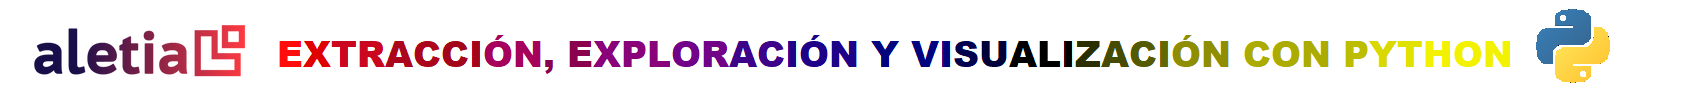

# Utiliza el archivo "store_sales_aletia.xlsx" para realizar los siguientes retos

**Descripción de los datos:**
La tabla contiene información de ventas por tienda y fecha, además de algunos datos adicionales como el número de ventas asociado a la fecha, el monto vendido y el número de clientes que entraron a la tienda



---



0. Para descargar los datos utiliza el siguiente [enlace](https://mega.nz/#P!AgG7V1eJglrfa0MX4Cme2-c7Tb2VyAVPkbOLUXX5fAA_YX8XCl_q896eVGxV3vCDF5XYYlBZqpeIxHoJSJahHV8RNSkZ51RMM2M1kOO6mENlfwxDeFeT0YF7x6trrMWpehZYJRtHNyU) e ingresa el password "aletiamodulo2"

1. Descubre que tipo de datos tiene cada columna
2. Calcula medidas de tendencia central y dispersión de los datos
3. Elabora gráficos de caja o histogramas para identificar outliers
4. Elige algún método para tratar los outliers
5. Estandariza los datos mediante el método de normalización
6. Reduce la dimensionalidad a 2 variables y grafica tus datos
7. Escribe tus propias conclusiones sobre los datos explorados

<h3>Hint 0: 
Puede que necesites algunas bibliotecas:
- numpy
- sklearn
- matplotlib
- pandas

In [49]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

<h3> Hint 1: Regla de distribución normal:

<img src='https://dhtrust.org/wp-content/uploads/2021/09/1*IZ2II2HYKeoMrdLU5jW6Dw.png' width="600" height="300">

In [71]:
df = pd.read_excel('store_sales_aletia.xlsx')
df.dtypes

id                           object
sales_date                   object
sales_datetime       datetime64[ns]
sales_count                   int64
sales_amount                  int64
sales_discount              float64
customers_per_day             int64
dtype: object

In [72]:
df.isnull().sum()

id                   0
sales_date           0
sales_datetime       0
sales_count          0
sales_amount         0
sales_discount       0
customers_per_day    0
dtype: int64

No hay nulos

In [73]:
df.head()

,id,sales_date,sales_datetime,sales_count,sales_amount,sales_discount,customers_per_day
0,db80363d35f10926,2016-01-01 00:00:00,2016-01-01 01:00:00,5,2930,0.00,141
1,db80363d35f10926,2016-01-02 00:00:00,2016-01-01 16:00:00,2,1640,0.18,40
2,db80363d35f10926,2016-01-02 00:00:00,2016-01-01 15:00:00,4,772,0.00,35
3,db80363d35f10926,2016-01-02 00:00:00,2016-01-02 14:00:00,2,1616,0.00,66
4,db80363d35f10926,2016-01-02 00:00:00,2016-01-02 02:00:00,3,2373,0.00,99


In [74]:
df['Year'] = pd.DatetimeIndex(df['sales_datetime']).year
df['Month'] = pd.DatetimeIndex(df['sales_datetime']).month
df['Day'] = pd.DatetimeIndex(df['sales_datetime']).day

In [75]:
years = pd.DataFrame(df.groupby(['Year']).mean())
years['Year'] = years.index
years

,sales_count,sales_amount,sales_discount,customers_per_day,Month,Day,Year
Year,,,,,,,
2016,4.323216,2380.562655,0.046629,85.617856,9.268371,16.304934,2016
2017,3.796875,2077.244792,0.047889,75.057904,2.409314,14.803922,2017


In [76]:
fig = px.bar(years, x="Year",y="sales_amount")
fig.show()

En promedio se vendio mas en el 2016 que en 2017

In [77]:
month = pd.DataFrame(df.groupby(['Month']).mean())
month['Month'] = month.index
month

,sales_count,sales_amount,sales_discount,customers_per_day,Year,Day,Month
Month,,,,,,,
1,3.903677,2128.093734,0.046950,78.240808,2016.866908,16.304505,1
2,3.811771,2088.137858,0.047010,75.682397,2016.889183,14.547190,2
3,4.057168,2199.900616,0.051306,78.419525,2016.883026,15.226913,3
4,3.878746,2155.058537,0.046404,78.331010,2016.814634,12.928223,4
5,6.182796,3548.607527,0.058978,128.591398,2016.000000,16.752688,5
6,5.610526,3059.052632,0.045947,112.563158,2016.000000,15.921053,6
7,4.122449,2197.739796,0.044949,85.719388,2016.000000,10.137755,7
8,10.000000,6991.333333,0.000000,144.000000,2016.000000,7.666667,8
9,12.750000,4900.916667,0.075000,237.916667,2016.000000,24.833333,9


In [78]:
fig = px.bar(month, x="Month",y="sales_amount")
fig.show()

Hay mas ventas promedio en el mes de agosto

In [79]:
day = pd.DataFrame(df.groupby(['Day']).mean())
day['Day'] = day.index
day

,sales_count,sales_amount,sales_discount,customers_per_day,Year,Month,Day
Day,,,,,,,
1,4.308483,2307.550129,0.052571,79.115681,2016.508997,6.205656,1
2,3.902613,2307.710214,0.043587,85.434679,2016.562945,5.427553,2
3,4.207317,2202.609756,0.042988,78.000000,2016.652439,5.192073,3
4,4.139535,2341.974160,0.048114,83.798450,2016.519380,5.485788,4
5,4.115385,2156.764103,0.041872,79.623077,2016.605128,5.061538,5
6,4.940722,2651.283505,0.047371,99.618557,2016.582474,5.012887,6
7,4.083123,2299.977330,0.049421,81.186398,2016.536524,5.612091,7
8,4.217184,2211.935561,0.043246,84.515513,2016.575179,5.389021,8
9,3.720322,2145.899396,0.047726,74.207243,2016.519115,5.430584,9


In [80]:
fig = px.bar(month, x="Day",y="sales_amount")
fig.show()

Hay mas ventas promedio en el primer dia del mes

In [81]:
df.sales_date.value_counts()

#VALUE!                3886
2017-02-25 00:00:00     128
2017-02-18 00:00:00     124
2017-03-25 00:00:00     120
2017-03-04 00:00:00     115
                       ... 
2016-07-25 00:00:00       1
2016-04-04 00:00:00       1
2016-07-17 00:00:00       1
2016-05-17 00:00:00       1
2016-06-14 00:00:00       1
Name: sales_date, Length: 352, dtype: int64

Hay mas 3886 perdidos

In [84]:
df.sales_datetime.value_counts()

2016-12-25 13:00:00    29
2017-03-03 14:00:00    29
2017-03-12 15:00:00    27
2016-11-11 21:00:00    26
2016-02-09 01:00:00    24
                       ..
2016-02-16 19:00:00     1
2016-01-15 13:00:00     1
2017-02-18 02:00:00     1
2016-02-02 11:00:00     1
2016-01-15 01:00:00     1
Name: sales_datetime, Length: 3776, dtype: int64

In [85]:
df[df.sales_date=='#VALUE!']

,id,sales_date,sales_datetime,sales_count,sales_amount,sales_discount,customers_per_day,Year,Month,Day
1567,965b2e0cf4119003,#VALUE!,2016-10-25 17:00:00,5,3410,0.00,236,2016,10,25
1568,42c9aa6d617c5057,#VALUE!,2016-10-26 13:00:00,5,2365,0.00,41,2016,10,26
1569,45326ebb8dc72cfb,#VALUE!,2016-10-26 21:00:00,1,254,0.00,11,2016,10,26
1570,45326ebb8dc72cfb,#VALUE!,2016-10-26 21:00:00,1,866,0.00,16,2016,10,26
1571,0a74a5408a0b8642,#VALUE!,2016-10-27 14:00:00,2,256,0.26,21,2016,10,27
...,...,...,...,...,...,...,...,...,...,...
5448,324f7c39a8410e7c,#VALUE!,2016-12-29 19:00:00,4,2936,0.11,42,2016,12,29
5449,324f7c39a8410e7c,#VALUE!,2016-11-27 18:00:00,2,1634,0.00,42,2016,11,27
5450,324f7c39a8410e7c,#VALUE!,2016-12-30 18:00:00,7,3192,0.00,112,2016,12,30
5451,db80363d35f10926,#VALUE!,2016-12-09 20:00:00,7,1505,0.00,148,2016,12,9


Aunque no haya valores en sales_date si hay valores en sales_datetime

In [82]:
df.id.value_counts()

0a74a5408a0b8642    1831
24b9b2a020826ede    1143
3cad29d1a23209d2     823
965b2e0cf4119003     766
42c9aa6d617c5057     738
e053c561f32acc28     681
db80363d35f10926     657
36429b5ca4407b3e     617
1033310359ceeac1     595
4beac252540f865e     507
2fc478dc9f0a6b31     481
632ba66e1f75aa28     429
40f6193ea3ed1b91     332
55c3627912b9c849     302
89e7328af22efe74     288
3440e0ea1b70a99b     283
bb09595bab7d5cfb     261
fc477473134e9ae5     229
324f7c39a8410e7c     215
f068442ebb6c246c     185
45326ebb8dc72cfb     182
bf617aa68d5f1cfa     157
fea5dc9594450608     140
e89735e80d614a7e     105
831658500aa7c846      75
bcce1ea4350b7b72      52
2c6c79d597e48096      28
d500b48a8735fbd3      13
00a91d42b08b08d9      12
6b2268863b14a2af      11
d477b6339b8ce69f       7
dc71c6cc06cd1aa2       5
aed3a8b49abe4a48       3
1f1390a8be2272b3       2
1d1e8860ae04f8e9       2
234d3dbf7f3d5a50       2
e01d99390355408d       1
f0fb0975bdc2cdf9       1
8cc350fd70ee0757       1
Name: id, dtype: int64

Hay Ids repetidos aunque cada compra deberia ser un Id unico

In [86]:
df.shape

(12162, 10)

In [87]:
df.isnull().sum()

id                   0
sales_date           0
sales_datetime       0
sales_count          0
sales_amount         0
sales_discount       0
customers_per_day    0
Year                 0
Month                0
Day                  0
dtype: int64

In [88]:
df.describe()

,sales_count,sales_amount,sales_discount,customers_per_day,Year,Month,Day
count,12162.000000,12162.000000,12162.000000,12162.000000,12162.000000,12162.000000,12162.000000
mean,4.040701,2217.755632,0.047306,79.949762,2016.536754,5.586746,15.499260
std,4.141749,2679.478834,0.111013,105.194693,0.498668,4.276434,8.554514
min,1.000000,100.000000,0.000000,8.000000,2016.000000,1.000000,1.000000
25%,2.000000,872.000000,0.000000,32.000000,2016.000000,2.000000,8.000000
50%,3.000000,1530.000000,0.000000,52.000000,2017.000000,3.000000,15.000000
75%,4.000000,2523.750000,0.000000,88.000000,2017.000000,11.000000,23.000000
max,56.000000,45850.000000,0.600000,2304.000000,2017.000000,12.000000,31.000000


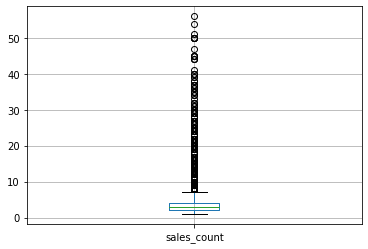

In [89]:
boxplot = df.boxplot(column=['sales_count'])  

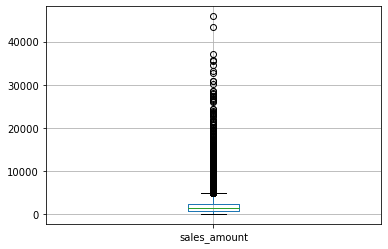

In [90]:
boxplot = df.boxplot(column=['sales_amount'])  

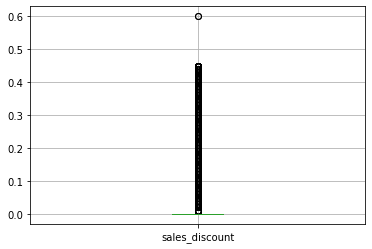

In [91]:
boxplot = df.boxplot(column=['sales_discount'])

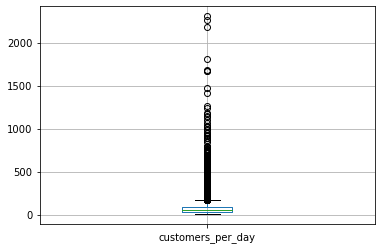

In [92]:
boxplot = df.boxplot(column=['customers_per_day'])

In [96]:
len(df)

12162

In [93]:
Q1 = np.percentile(df['sales_count'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['sales_count'], 75,
                   interpolation = 'midpoint')
df_1 = df[df.sales_count<=2]

In [94]:
len(df_1)

5859

In [95]:
df_1

,id,sales_date,sales_datetime,sales_count,sales_amount,sales_discount,customers_per_day,Year,Month,Day
1,db80363d35f10926,2016-01-02 00:00:00,2016-01-01 16:00:00,2,1640,0.18,40,2016,1,1
3,db80363d35f10926,2016-01-02 00:00:00,2016-01-02 14:00:00,2,1616,0.00,66,2016,1,2
6,db80363d35f10926,2016-01-02 00:00:00,2016-01-02 18:00:00,2,470,0.00,20,2016,1,2
15,3cad29d1a23209d2,2016-01-06 00:00:00,2016-01-04 14:00:00,2,228,0.00,40,2016,1,4
17,632ba66e1f75aa28,2016-01-06 00:00:00,2016-01-06 15:00:00,2,302,0.00,66,2016,1,6
...,...,...,...,...,...,...,...,...,...,...
12151,1033310359ceeac1,2017-05-24 00:00:00,2017-04-05 18:00:00,2,638,0.00,19,2017,4,5
12155,1033310359ceeac1,2017-05-26 00:00:00,2017-04-05 18:00:00,2,282,0.00,57,2017,4,5
12156,1033310359ceeac1,2017-05-26 00:00:00,2017-04-21 17:00:00,2,1816,0.15,88,2017,4,21
12158,1033310359ceeac1,2017-05-28 00:00:00,2017-04-15 22:00:00,2,1546,0.12,32,2017,4,15


<h3> Hint 2: Análisis de componentes principales

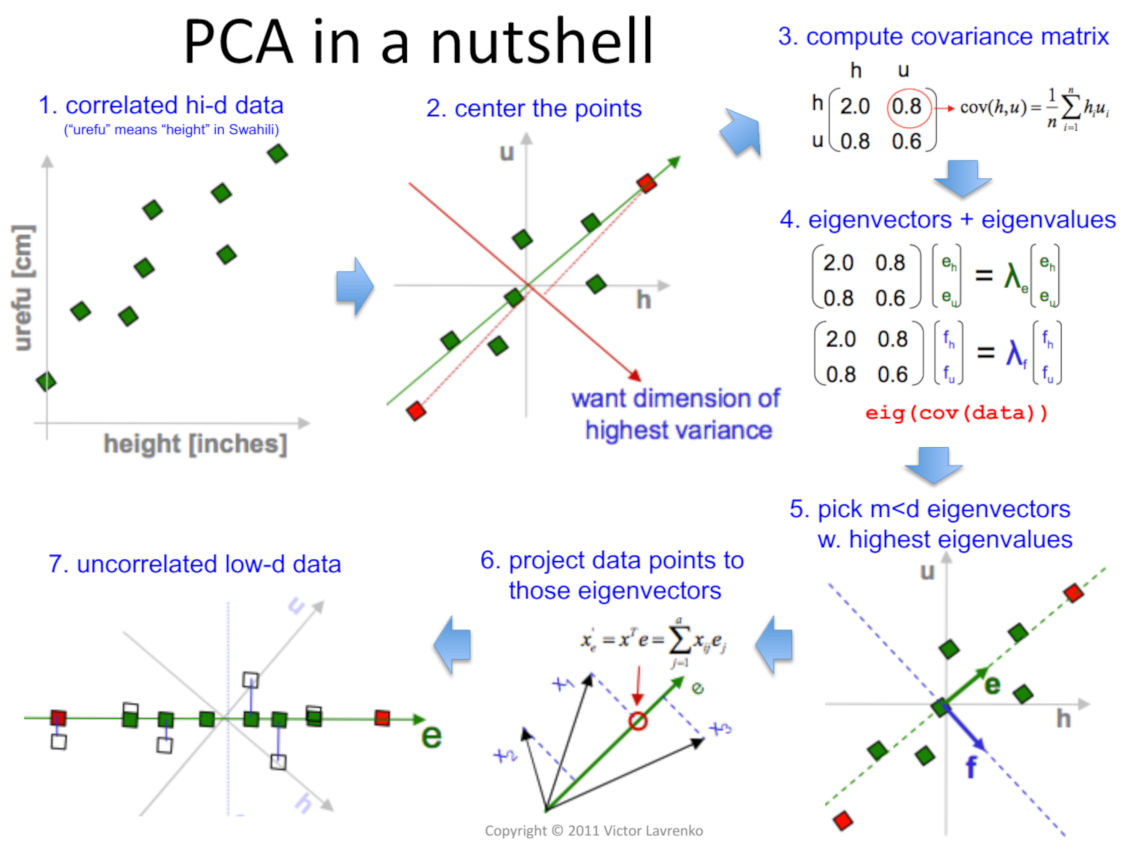

<h3> Hint 3: Medidas de tendencia central

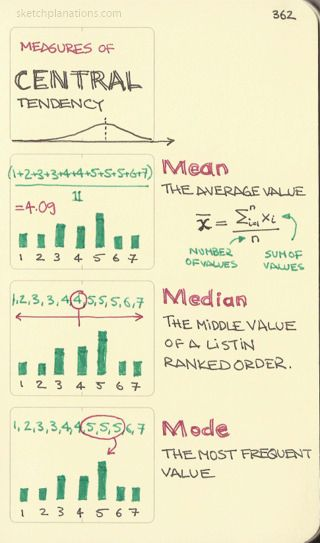

In [116]:
df_ = df[['sales_count','sales_amount','sales_discount','customers_per_day','Year','Month','Day']]

In [117]:
from sklearn import preprocessing

x = df_.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled)

In [118]:
df_scaled

,0,1,2,3,4,5,6
0,0.072727,0.061858,0.000000,0.057927,0.0,0.000000,0.000000
1,0.018182,0.033661,0.300000,0.013937,0.0,0.000000,0.000000
2,0.054545,0.014689,0.000000,0.011760,0.0,0.000000,0.000000
3,0.018182,0.033137,0.000000,0.025261,0.0,0.000000,0.033333
4,0.036364,0.049683,0.000000,0.039634,0.0,0.000000,0.033333
...,...,...,...,...,...,...,...
12157,0.036364,0.030536,0.516667,0.010453,1.0,0.090909,0.266667
12158,0.018182,0.031607,0.200000,0.010453,1.0,0.272727,0.466667
12159,0.018182,0.014426,0.116667,0.011324,1.0,0.272727,0.566667
12160,0.127273,0.037158,0.000000,0.156794,1.0,0.272727,0.600000


In [120]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_scaled)

PCA(n_components=2)

In [121]:
print(pca.components_)

[[ 0.00596977  0.00426665 -0.00281904  0.00275137 -0.80530295  0.59061118
   0.05095318]
 [-0.00830778 -0.00559587  0.00857246 -0.00502619  0.0217442  -0.05626912
   0.9980791 ]]


In [122]:
print(pca.explained_variance_)

[0.36320892 0.08063522]


In [125]:
from sklearn.pipeline import Pipeline

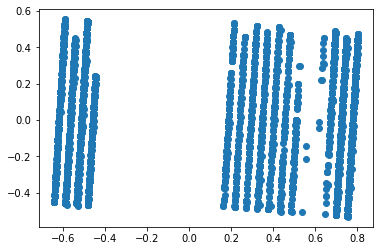

In [126]:
Xt = pca.fit_transform(df_scaled)
plot = plt.scatter(Xt[:,0], Xt[:,1])

Dos componentes principales no son suficientes para explicar toda la variabilidad. Se observan 11 lineas paralelas entre si